
# Movie Recommendation System

## Group 8 Members

 1. [Samuel Gichuru](https://github.com/SammyGichuru)
 2. [Sheila Mulwa](https://github.com/Sheila-Mulwa )
 3. [Nashon Okumu](https://github.com/NashonOkumu)
 
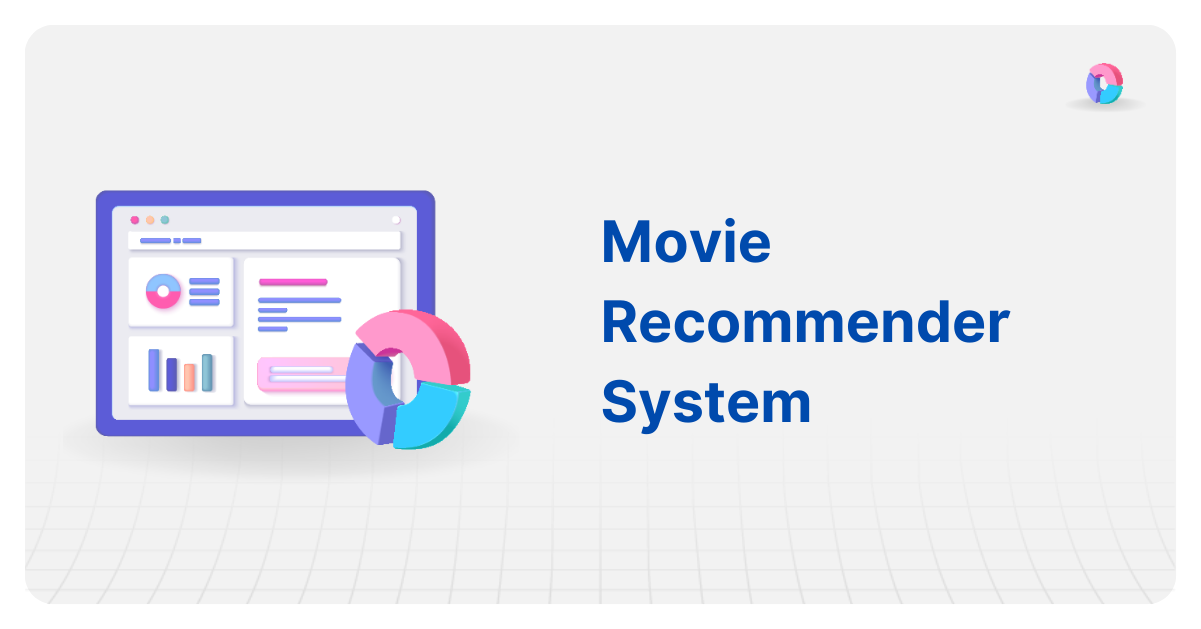
 

## Business Understanding

## Data Understanding

## Data Preparation & Analysis

## Modeling & Evaluation

## Deployement

## Conclusion & Recommendations